<a href="https://colab.research.google.com/github/geyani998/Customer-Churn-Analysis/blob/main/UROP_SA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/ML CSV files/Sentimental analysis of COVID-19 Tweets.csv"
dataset = pd.read_csv(path)
dataset.head()

,tweets,sentiment
0,Chinese citizens caught faking COVID-19 tests ...,neutral
1,"RT @RunesSmash: After Covid dies down, Can we ...",negative
2,RT @Neurophysik: Many COVID-19 patients recove...,positive
3,MLBは7/23 or 7/24開幕みたいだが、果たして本当に開幕できるのか。国内の感染状況...,neutral
4,RT @NicholsUprising: A Virginia physician who ...,neutral


In [ ]:
dataset.shape

(179859, 2)

**DATA PREPROCESSING**

In [ ]:
dataset.shape

(179859, 2)

In [ ]:
print(dataset.sentiment.value_counts())
dataset.drop_duplicates(inplace=True)

neutral     98844
positive    40693
negative    40322
Name: sentiment, dtype: int64


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Removing RT, Punctuation, special characters... etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
dataset["tweets"] = dataset.tweets.map(remove_rt).map(rt)
dataset["tweets"] = dataset.tweets.str.lower()
dataset.head(10)

,tweets,sentiment
0,chinese citizens caught faking covid 19 tests ...,neutral
1,after covid dies down can we please normaliz...,negative
2,many covid 19 patients recover on their own ...,positive
3,mlb 7 23 or 7 24 ...,neutral
4,a virginia physician who said my perspective...,neutral
5,,neutral
6,la mitad de las regiones de estados unidos ex...,neutral
7,covid is a scam me,neutral
8,o gov jo o doria e o prefeito bruno covas v...,neutral
9,my last customer today said he hates having t...,neutral


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
total_pos=len(dataset.loc[dataset['sentiment'] == "positive"])
total_neg=len(dataset.loc[dataset['sentiment'] == "negative"])
total_neu=len(dataset.loc[dataset['sentiment'] == "neutral"])
total_tweets=len(dataset)
print("Total Positive Tweets % : {:.2f}".format( (total_pos/total_tweets)*100))
print("Total Negative Tweets % : {:.2f}".format((total_neg/total_tweets)*100))
print("Total Neutral Tweets % : {:.2f}".format((total_neu/total_tweets)*100))

Total Positive Tweets % : 24.39
Total Negative Tweets % : 14.29
Total Neutral Tweets % : 61.32


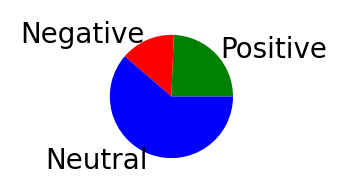

In [ ]:

import matplotlib.pyplot as plt
mylabels = ["Positive", "Negative", "Neutral"]
mycolors = ["Green", "Red", "Blue"]
plt.figure(figsize=(1,1), dpi = 200)
myexplode = [0, 0, 0]
plt.pie([total_pos,total_neg,total_neu],colors=mycolors,labels=mylabels,explode = myexplode)
plt.show()

In [ ]:
tweet_list=pd.DataFrame(dataset['tweets'])
tweet_list


,tweets
0,chinese citizens caught faking covid 19 tests ...
1,after covid dies down can we please normaliz...
2,many covid 19 patients recover on their own ...
3,mlb 7 23 or 7 24 ...
4,a virginia physician who said my perspective...
...,...
179842,trump will get crushed in pima county by a ...
179846,las brigadas para ubicar contagios por covid ...
179848,well i haven t had covid
179849,king covid the 19th


In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_list['punct'] = tweet_list['tweets'].apply(lambda x: remove_punct(x))

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_list['tokenized'] = tweet_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tweet_list['nonstop'] = tweet_list['tokenized'].apply(lambda x: remove_stopwords(x))
word_tokens = tweet_list["nonstop"]
print(word_tokens)

0         [chinese, citizens, caught, faking, covid, tes...
1         [, covid, dies, please, normalize, wearing, ma...
2         [, many, covid, patients, recover, quoting, jo...
3                                                   [mlb, ]
4         [, virginia, physician, said, perspective, cur...
                                ...                        
179842    [, trump, get, crushed, pima, county, larger, ...
179846    [, las, brigadas, para, ubicar, contagios, por...
179848                                        [well, covid]
179849                                [, king, covid, th, ]
179853    [, andrea, lo, peor, del, covid, se, viene, en...
Name: nonstop, Length: 64987, dtype: object


In [ ]:
print(tweet_list.head())

                                              tweets  \
0  chinese citizens caught faking covid 19 tests ...   
1   after covid dies down  can we please normaliz...   
2   many covid 19 patients recover on their own  ...   
3  mlb 7 23 or 7 24                              ...   
4   a virginia physician who said  my perspective...   

                                               punct  \
0  chinese citizens caught faking covid  tests so...   
1   after covid dies down  can we please normaliz...   
2   many covid  patients recover on their own  qu...   
3  mlb   or                                      ...   
4   a virginia physician who said  my perspective...   

                                           tokenized  \
0  [chinese, citizens, caught, faking, covid, tes...   
1  [, after, covid, dies, down, can, we, please, ...   
2  [, many, covid, patients, recover, on, their, ...   
3                                        [mlb, or, ]   
4  [, a, virginia, physician, who, said, my, p

In [ ]:
#pip install nltk

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_list['stemmed'] = tweet_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmatizing(text):
  text = ' '.join([wnl.lemmatize(words) for words in text])
  return text
tweet_list['lemmatized'] = tweet_list['stemmed'].apply(lambda x: stemming(x))
print(tweet_list['lemmatized'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         [chine, citizen, caught, fake, covid, test, le...
1         [, covid, die, plea, normal, wear, mask, us, s...
2         [, mani, covid, patient, recov, quot, journal,...
3                                                   [mlb, ]
4         [, virginia, physician, said, perspect, curren...
                                ...                        
179842    [, trump, get, crush, pima, counti, larger, ma...
179846    [, la, brigada, para, ubicar, contagio, por, c...
179848                                        [well, covid]
179849                                [, king, covid, th, ]
179853    [, andrea, lo, peor, del, covid, se, vien, en,...
Name: lemmatized, Length: 64987, dtype: object


In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Final Data frame with clean text**

In [ ]:
#print(word_tokens)
final_df = pd.DataFrame(word_tokens,columns=['text'])
final_df['text'] = tweet_list['lemmatized']
final_df['target'] = dataset['sentiment']
X = final_df.text # get all the text in x variable
y = final_df.target
print(X,y)
print(X.shape,y.shape)
final_df['text']= final_df['text'].str.join(" ")
final_df.head()


0         [chine, citizen, caught, fake, covid, test, le...
1         [, covid, die, plea, normal, wear, mask, us, s...
2         [, mani, covid, patient, recov, quot, journal,...
3                                                   [mlb, ]
4         [, virginia, physician, said, perspect, curren...
                                ...                        
179842    [, trump, get, crush, pima, counti, larger, ma...
179846    [, la, brigada, para, ubicar, contagio, por, c...
179848                                        [well, covid]
179849                                [, king, covid, th, ]
179853    [, andrea, lo, peor, del, covid, se, vien, en,...
Name: text, Length: 64987, dtype: object 0          neutral
1         negative
2         positive
3          neutral
4          neutral
            ...   
179842    positive
179846     neutral
179848     neutral
179849     neutral
179853     neutral
Name: target, Length: 64987, dtype: object
(64987,) (64987,)


,text,target
0,chine citizen caught fake covid test leav russia,neutral
1,covid die plea normal wear mask us sick tire ...,negative
2,mani covid patient recov quot journal publish...,positive
3,mlb,neutral
4,virginia physician said perspect current coro...,neutral


In [ ]:
final_df["text"]= final_df["text"].str.join("")
final_df.head()

,text,target
0,chine citizen caught fake covid test leav russia,neutral
1,covid die plea normal wear mask us sick tire ...,negative
2,mani covid patient recov quot journal publish...,positive
3,mlb,neutral
4,virginia physician said perspect current coro...,neutral


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
tfidf = vectorizer.fit_transform(final_df['text']).toarray()
print(tfidf)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
labels = final_df.iloc[:, 1].values
labels

array(['neutral', 'negative', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tfidf,labels, test_size=0.2, random_state=0)
X = tfidf
Y = labels

In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tweet_list['lemmatized'])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(Y_predict)
pred_prob1 = model.predict_proba(X_test)
Y_test

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


array(['positive', 'neutral', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))

[[ 356 1433   47]
 [  64 7957   62]
 [  39 2477  563]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

    negative       0.78      0.19      0.31      1836
     neutral       0.67      0.98      0.80      8083
    positive       0.84      0.18      0.30      3079

    accuracy                           0.68     12998
   macro avg       0.76      0.45      0.47     12998
weighted avg       0.72      0.68      0.61     12998



accuracy score for KNN

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test,Y_predict)

0.8610555470072319


col_0,negative,neutral,positive
row_0,,,
negative,1242,302,292
neutral,238,7544,301
positive,270,403,2406


F1 score, recall score for KNN

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_predict, average='micro'))
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_predict, average='micro'))

Precision score for KNN

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_predict, average='micro'))

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print("Y_predict is: ",Y_predict)
print("Y_test is: ",Y_test)

Y_predict is:  ['positive' 'neutral' 'neutral' ... 'positive' 'neutral' 'neutral']
Y_test is:  ['positive' 'neutral' 'neutral' ... 'positive' 'neutral' 'neutral']


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))

[[1242  302  292]
 [ 238 7544  301]
 [ 270  403 2406]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

    negative       0.71      0.68      0.69      1836
     neutral       0.91      0.93      0.92      8083
    positive       0.80      0.78      0.79      3079

    accuracy                           0.86     12998
   macro avg       0.81      0.80      0.80     12998
weighted avg       0.86      0.86      0.86     12998



Accuracy score for Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test,Y_predict)

Precision score for Decision Tree

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_predict, average='micro'))

0.8610555470072319


Recall and F1 score for Decision Tree

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_predict, average='micro'))
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_predict, average='weighted'))

0.8610555470072317
0.8610555470072319


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
Y_predict
Y_test

array(['positive', 'neutral', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))

[[1745   33   58]
 [4525 3340  218]
 [2516  104  459]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

    negative       0.20      0.95      0.33      1836
     neutral       0.96      0.41      0.58      8083
    positive       0.62      0.15      0.24      3079

    accuracy                           0.43     12998
   macro avg       0.59      0.50      0.38     12998
weighted avg       0.77      0.43      0.46     12998



Accuracy score for Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test,Y_predict)

0.42652715802431146


col_0,negative,neutral,positive
row_0,,,
negative,1745,33,58
neutral,4525,3340,218
positive,2516,104,459


Precision score for Naive Bayes

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_predict, average='micro'))

Recall, F1 score for Naive Bayes

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_predict, average='micro'))
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_predict, average='weighted'))

**ANN**

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
Y_predict


array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict))

[[   0 1836    0]
 [   0 8083    0]
 [   0 3079    0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1836
     neutral       0.62      1.00      0.77      8083
    positive       0.00      0.00      0.00      3079

    accuracy                           0.62     12998
   macro avg       0.21      0.33      0.26     12998
weighted avg       0.39      0.62      0.48     12998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for ann

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))
pd.crosstab(Y_test,Y_predict)

0.6218649022926604


col_0,neutral
row_0,
negative,1836
neutral,8083
positive,3079


Precision score for ANN

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_predict, average='micro'))

Recall, F1 score for ANN

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_predict, average='micro'))
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_predict, average='weighted'))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')
rf_clf.fit(X_train,Y_train)

Accuracy score for random forest

In [ ]:
y_predict = rf_clf.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(Y_test,y_predict))

Precision score for random forest

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_predict, average='micro'))

Recall, f1 score for random forest

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_predict, average='micro'))
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_predict, average='weighted'))